In [201]:
import sklearn.datasets
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import numpy as np

crazyRich = DataFrame()
crazyRich = pd.read_excel(r'C:\Users\chrsl\OneDrive\Desktop\CURE\Deliverables 4\BillionairesIndexformatted.xlsx')

crazyRich_sorted = crazyRich.sort_values('Industry', ignore_index=True)
f0 = crazyRich_sorted.Industry.value_counts()

crazyRich_attributes = crazyRich_sorted.drop(columns=["Rank", "Name", "Industry", "Country"], axis=1)


In [202]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

le = preprocessing.LabelEncoder()

dfx_train, dfx_test, sy_train, sy_test = train_test_split(crazyRich_attributes, crazyRich_sorted.Industry)

# crazyRich_attributes is dataframe for attributes, crazyRich_attributes is dataframe for classes (industries)

# Trains to find classes
le = le.fit(sy_train)
y_train = le.transform(sy_train)

In [203]:
# Learning and fitting on training set

nl = preprocessing.MinMaxScaler()
nl = nl.fit(dfx_train.to_numpy())
x_train = nl.transform(dfx_train.to_numpy())

In [204]:
# Selecting the amount of neighbours then fitting the knn value with the training set 

knn = KNeighborsClassifier(n_neighbors=1)
knn = knn.fit(x_train, y_train)

In [205]:
# Testing the knn classifier using the test sets

x_test = nl.transform(dfx_test.to_numpy())
y_test = le.transform(sy_test.to_numpy())

# Testing to predict the class

knn.predict(x_test)

array([2, 4, 3, 4, 3, 0, 2, 0, 4, 2, 4, 3, 3, 4, 1, 3, 0, 4, 0, 1, 0, 1,
       1, 3, 1, 4, 0, 4, 1, 0, 2, 3, 1, 4, 3, 4, 3, 2, 4, 4, 0, 3, 3, 4,
       1, 4, 2, 3, 4, 2, 1, 3, 3, 2, 3, 3, 2, 4, 4, 3, 3, 2, 1, 1, 1, 1,
       0, 0, 3, 4, 0])

In [206]:
y_test

array([2, 4, 2, 0, 3, 3, 4, 0, 4, 0, 4, 3, 3, 3, 3, 3, 4, 3, 0, 4, 3, 4,
       2, 3, 1, 4, 2, 2, 0, 4, 2, 4, 4, 4, 3, 4, 4, 4, 4, 0, 0, 1, 1, 3,
       2, 4, 1, 4, 4, 4, 1, 4, 2, 2, 3, 0, 4, 2, 4, 2, 1, 0, 2, 1, 4, 2,
       3, 4, 3, 0, 4])

In [207]:
knn.score(x_test, y_test)


0.38028169014084506

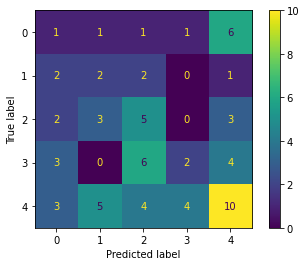

In [208]:
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

KN = KNeighborsClassifier(n_neighbors = 41)
KN = KN.fit(x_train, y_train)
y_predict = KN.predict(x_test)
confusionM = confusion_matrix(y_test,y_predict)
tn = ConfusionM.ravel()
plot_confusion_matrix(KN, x_test, y_test)
plt.show()

In [209]:
KN=KNeighborsClassifier(n_neighbors=41)
KN=KN.fit(x_train,y_train)
y_test = le.transform(sy_test.to_numpy())
x_test = nl.transform(dfx_test.to_numpy())
print (KN.score(x_train,y_train),',',KN.score(x_test,y_test))

0.3113207547169811 , 0.28169014084507044


In [210]:
predicT = DataFrame()

predicT ['Total_Net_Worth'] = [5840000000]
predicT ['LastChange'] = [-67800000]
predicT ['YTDChange'] = [1240000000]

NewPrediction = nl.transform(predicT.to_numpy())
knn.predict(NewPrediction )
le.inverse_transform(knn.predict(predicT.to_numpy()))

array(['Technology'], dtype=object)